# NICO2AI  4回 scikit-learn入門(18/01/27)

## 4.1 オブジェクト指向

これまでクラスやオブジェクト指向を意識せずにコーディングをしてきましたが、本日からはオブジェクト指向の考え方を導入して、実装を進めていきます。


In [1]:
# 一度変数を初期化しておきます「yを押してenterしてください」
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [0]:
# A. 今日使うパッケージのインポート
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.colors import LogNorm
from sklearn import datasets

# B. 実行上問題のないWarningは非表示にする
import warnings
warnings.filterwarnings('ignore')

# C1. Plotを描画できるようにする
%matplotlib inline

# C2. デフォルトのPlotスタイルシートの変更
plt.style.use('ggplot')
plt.rcParams['ytick.color'] = '111111'
plt.rcParams['xtick.color'] = '111111'
plt.rcParams['axes.labelcolor'] = '111111'
plt.rcParams['font.size'] = 15


### クラス設計の例

動物クラスを作成し、クラス変数（メンバ変数）に、動物の種類名、鳴き声を用意。
メソッドとして、コンストラクタ(オブジェクト生成時に呼ばれる関数)、と、鳴き声のセット、鳴くという3つのメソッドを実装し、オブジェクトを生成して、犬をワンと鳴かせます。

※スライドで見せたC言語の例とは少し変えて、鳴き声は関数でセットすることにしました。

※クラスというのは雛形、オブジェクトは雛形からできた物体です。よく、たい焼き機がクラス、たい焼きがオブジェクトと説明されます。


In [0]:
class Animal(object):
    """動物のクラスを作成します"""

    def __init__(self, name1):
        """コンストラクタです、クラスが初めて生成されたときに実行されます"""
        self.name = name1  # 名前
        self.cry = '鳴き声未定義です'  # 鳴き声は未定義という文字を入れておく
        
    def set_cry(self, input_cry):
        """鳴き声のセット"""
        self.cry = input_cry  # 鳴き声
        

    def sound(self):
        """sound the animal's cry"""
        print('鳴き声：' + self.cry)
    


In [0]:
DOG = Animal('犬') # Animalクラスで引数（name1=犬）というオブジェクトDOGを生成


In [5]:
print(DOG.name) # .でメンバ変数にアクセスできる
print(DOG.cry)

# 鳴き声は未定義になっています

犬
鳴き声未定義です


In [0]:
DOG.set_cry('ワン') # DOGの鳴き声をワンになるように設定します

In [7]:
print(DOG.name)
print(DOG.cry)


犬
ワン


In [8]:
DOG.sound() #DOGオブジェクトのsound()メソッドを実行


鳴き声：ワン


## 練習クイズ

線形回帰を実行するクラス、Original_LS_regressionを作成せよ。
クラス変数（メンバ変数）は、theta_LSとする。
メソッドは、コンストラクタ、fit(X,t)、y = predict(plt_X)の3つとせよ（10分間）。


※ヒント　
y = predict()では、関数の値を出力するのにreturnを使ってあげましょう。

In [0]:
# データの作成
rnd = np.random.RandomState(0)  # 全員同じ結果が得られるように、乱数のseedを固定します
N_TRAIN = 30  # 訓練データ数
x = np.linspace(-3, 3, N_TRAIN)
t = 0.5 * x + 0.2 + 0.1 * rnd.randn(N_TRAIN)  # ガウシアンノイズを持つデータ点を生成

# 2. バイアス項 (常に係数が1) を列として加えた行列Xの作成
b = np.ones(N_TRAIN)
X = np.stack((x, b), axis=1)


In [0]:
# 自作の線形回帰クラスを宣言
# WRITE ME!


In [0]:
# Answer
# 自作の線形回帰クラスを宣言
class OriginalLsRegression(object):
    """自作の最小二乗近似クラス"""
    
    def __init__(self):
        self.theta_ls = []  # 線形近似の係数

    def fit(self, X, t):
        """データにフィッティングして、thetaの値を求めます"""
        self.theta_ls = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, t))

    def predict(self, plt_x):
        """入力でデータに対して、予測値を出力します"""
        y_pred = np.dot(plt_x, self.theta_ls)
        return y_pred  # 予測結果を返す


In [14]:
# 実行
my_reg = OriginalLsRegression() # オブジェクト生成

my_reg.fit(X, t) # データを使ってfitメソッドを実行

print(my_reg.theta_ls) # クラスのパラメータを表示

y_pred = my_reg.predict(X) # 予測　y=θ_LS・Xの計算


[0.48712302 0.24428564]


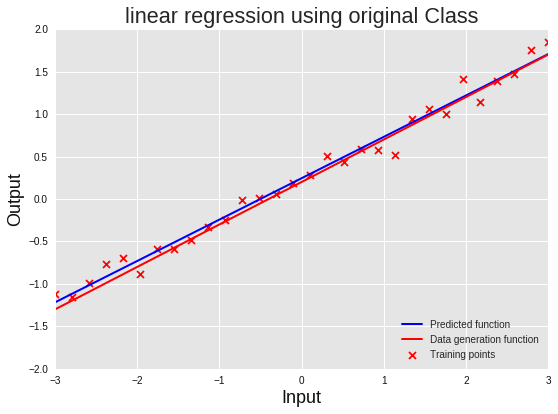

In [15]:
# データ生成関数（yの直線）,予測関数（y_predの直線）、及びデータ点tを描画
y = 0.5 * x + 0.2
plt.figure(figsize=(8, 6))
plt.title("linear regression using original Class")  # タイトル
plt.plot(x, y_pred, color="b", label="Predicted function", linewidth=2)  # ラベルをつける
plt.plot(x, y, color="r", label="Data generation function", linewidth=2)  # ラベルをつける
plt.scatter(x, t, marker="x", color="r", label="Training points")  # ラベルをつける
plt.xlim(-3, 3)  # xlim(最小値、最大値)
plt.ylim(-2, 2)  # ylim(最小値、最大値)
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend(loc="lower right")  # loc引数を指定することで、凡例の出現位置を制御できる
plt.tight_layout()  # グラフから文字がはみ出たりした場合に自動調整してくれる
plt.show()

## 4.2 デバッグ手法
pdbデバッグをはじめとした、デバッグ手法を学びます。

プログラムが複雑になってくると、バグの原因を見つけるのが難しくなってきます。
そこで今回はバグを取る方法をいくつか紹介します。

- **print文デバッグ:**
怪しい箇所にprint文を挟み、変数を確認する方法。
どんなプログラム言語でも有効な手段であり、よく使う。
- **pdb:**
python特有のデバッグ用ツール。インテラクティブに挙動を調べることができるので便利。

### 4.2.1 printデバッグ
printデバッグは、変数を調べたいと思う箇所にprint文で変数の中身を出力させ想定している変数と合致するか確かめる方法です。

- 単純に変数を出力 print(DATA)
- データのタイプを調べたい時　type(DATA)
- listの大きさを調べたい時 len(DATA)
- numpy配列の大きさを調べたい時　DATA.shape


In [17]:
DATA = [1, 2, 3, 4, 5, 6]

# 作戦1 
print(DATA)

# 作戦2 
print(len(DATA))

# 作戦3
print(type(DATA))

DATA = np.zeros([10, 4])

# 作戦4
print(DATA.shape)

[1, 2, 3, 4, 5, 6]
6
<class 'list'>
(10, 4)


### 4.2.2 pdbデバッグ
ここで、pdbというデバッグ用のライブラリを紹介します。これはpythonに標準装備されているライブラリです。<br>
エラー発生箇所の手前や変数の挙動を見たい位置に


``pdb.set_trace()``


という関数を挿入します。<br>
すると、挿入した箇所でいったんプログラムを中断すると同時に、インタラクティブなインターフェースが出てきます。<br>
例えば下の例で変数を打ち込んで中身を確かめてみてください。

**※pdbを終了する時は必ずq(quit) or c(continue)とコマンドを打って終了するようにしてください**

### pdbのコマンドの使い方
- a ：現在の関数の引数を表示。上の例では、x,y
- l ：現在の行の周辺のコードを表示。
- p 式　：式の内容を表示。例えば p zやp xなど
- n ：次の行を実行する
- q ：pdbを終了する
- c ：つぎのブレークポイントまで実行
- 他に普通にprintなどを実行することができます。

他にもコマンドがあるので調べてみてください。

以下の例で、コメントアウトを外し、各コマンドを実行してみてください。


#### ※Colaboratoryの環境だとうまくいかないときあります
なんか q うまくいかんな・・・

最後の行でpdb.set_trace()とエラーが出る場合もあり


In [0]:
import pdb

In [20]:
def plus(x=2, y=3):
    """This is a sum-method."""
    x = 2
    y = 3
    z = x + y
    pdb.set_trace() # これ
    print("%d + %d = %d" % (x, y, z))


plus()

# x
# pp x+y
# n 
# x > 0
# c

> <ipython-input-20-c7e52dc003af>(7)plus()
-> print("%d + %d = %d" % (x, y, z))
(Pdb) q


BdbQuit: ignored

## 練習クイズ
次のコードは前回線形回帰をするときに使ったコードですが、一部間違った箇所があり実行できません。
エラー文を読みつつデバッグしてみましょう。（6分間）


ヒント:


numpyのarryayの形を見る関数は 変数名.shape です。

In [0]:
import numpy as np

rnd = np.random.RandomState(1701)
N_TRAIN = 25  # 訓練データ数

# ガウシアンノイズを持つデータ点を生成
train_x = np.linspace(-3, 3, N_TRAIN)
train_y = 0.5 * train_x + 0.2 + 0.2 * rnd.randn(len(train_x))

# X = (train_xにバイアス項1の列ベクトルを追加)
X = np.stack((train_x, np.ones(len(train_x))))

# theta = (X^T X)^{-1} X^T y (方程式を解く)
theta = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, train_y))
print(theta)


In [0]:
# Answer
import numpy as np

rnd = np.random.RandomState(1701)
N_TRAIN = 25  # 訓練データ数

# ガウシアンノイズを持つデータ点を生成
train_x = np.linspace(-3, 3, N_TRAIN)
train_y = 0.5 * train_x + 0.2 + 0.2 * rnd.randn(len(train_x))

# X = (train_xにバイアス項1の列ベクトルを追加)
X = np.stack((train_x, np.ones(len(train_x))))

pdb.set_trace()
# theta = (X^T X)^{-1} X^T y (方程式を解く)
theta = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, train_y))
print(theta)

# X.shape
# train_y.shape

In [0]:
# Answer
import numpy as np

rnd = np.random.RandomState(1701)
N_TRAIN = 25  # 訓練データ数

# ガウシアンノイズを持つデータ点を生成
train_x = np.linspace(-3, 3, N_TRAIN)
train_y = 0.5 * train_x + 0.2 + 0.2 * rnd.randn(len(train_x))

# X = (train_xにバイアス項1の列ベクトルを追加)
X = np.stack((train_x, np.ones(len(train_x))), axis=1)  # !!! axis=1を追加 !!!

# theta = (X^T X)^{-1} X^T y (方程式を解く)
pdb.set_trace()
theta = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, train_y))
print(theta)


<hr>
# 4.3 scikit-learn 回帰
機械学習のライブラリ、scikit-learnについて勉強します。

scikit-learnでは基本的な流れとして
1. データの用意
2. モデルの選択
3. 訓練データのフィッティング(fit)
4. テストデータの予測(predict)

という4ステップで実行することができます。

## scikitlearnで線形回帰を書いてみる
基礎演習では線形回帰を例に見てみましょう<br>

**1.まずデータを用意します**

In [22]:
# 1. データの用意
rnd = np.random.RandomState(1701)
n_train = 25  # 訓練データ数

# ガウシアンノイズを持つデータ点を生成
train_x = np.linspace(-3, 3, n_train)
train_y = 0.5 * train_x + 0.2 + 0.2 * rnd.randn(len(train_x))

# ※sciki-learnで使用するときは、ベクトル形式にして使用します。
print(train_x.shape)

train_x = train_x.reshape(-1,1) # reshape(-1,1)は行は要素数だけ、列は1にするという命令
train_y = train_y.reshape(-1,1) 

print(train_x.shape)


(25,)
(25, 1)


**2.モデルを選択します**

線形回帰には

``sklearn.linear_model.LinearRegression``

というクラスを使います。
パラメータを指定したい時などはここで指定してあげます。

In [0]:
# 2. モデルの選択
from sklearn import linear_model
clf = linear_model.LinearRegression()

**3.フィッティングさせます**

In [25]:
# 3. モデルのフィッティング
clf.fit(train_x, train_y)

# 線形回帰では予測よりも実際の直線を知りたいことが多いですが、 その時は次のようにします
print("係数={}".format(clf.coef_))
print("バイアス={}".format(clf.intercept_))

係数=[[0.5164847]]
バイアス=[0.1650716]


**4.テストデータの予測をします**

In [26]:
# 4. テストデータを予測
test_x = [[-2.25], [-1], [0.5], [2.3]]
predict = clf.predict(test_x)
print(predict)

[[-0.99701897]
 [-0.3514131 ]
 [ 0.42331395]
 [ 1.3529864 ]]


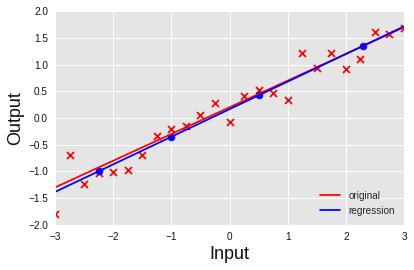

In [27]:
# 訓練データ、テストデータをプロットしてみる

# 生成関数
y = 0.5 * train_x + 0.2
plt.plot(train_x, y, color="r", label="original")

# 訓練データ
plt.scatter(train_x, train_y, marker="x", color="r")
plt.plot(train_x, clf.predict(train_x.reshape(-1, 1)), color="b", label="regression")

# 予測
plt.scatter(test_x, predict, color="b")


plt.xlim(-3, 3)  # xlim(最小値、最大値)
plt.ylim(-2, 2)  # ylim(最小値、最大値)
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend(loc="lower right")  # loc引数を指定することで、凡例の出現位置を制御できる
plt.tight_layout()  # グラフから文字がはみ出たりした場合に自動調整してくれる
plt.show()

## 練習クイズ
以下のデータ(x, t)に対して、scikit-learnの最小二乗法による線形近似により、傾きと切片の係数を求めよ。(5分間)


In [0]:
# 1. データの作成
rnd = np.random.RandomState(0)  # 全員同じ結果が得られるように、乱数のseedを固定します
N_TRAIN = 30  # 訓練データ数
x = np.linspace(-3, 3, N_TRAIN)
t = 5.5 * x + 1.2 + 2.0 * rnd.randn(N_TRAIN)  # ガウシアンノイズを持つデータ点を生成


In [30]:
# 2. モデルの選択
# write me!

# 3. モデルのフィッティング
# write me!


# 4. 結果
print(clf.coef_) # 傾き
print(clf.intercept_) # 切片


[[0.5164847]]
[0.1650716]


In [32]:
# Answer
# 2. モデルの選択
from sklearn import linear_model
clf = linear_model.LinearRegression()

# 3. モデルのフィッティング
clf.fit(x.reshape(-1, 1), t.reshape(-1, 1))

# 4. 結果
print(clf.coef_) # 傾き
print(clf.intercept_) # 切片




[[5.24246046]]
[2.08571289]


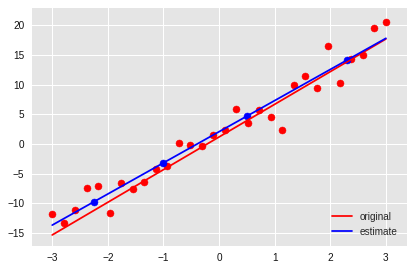

In [34]:
# 訓練データ、テストデータをプロットしてみる

# 生成関数
y = 5.5 * x + 1.2
plt.plot(x, y, color="r", label="original")

# 訓練データ
plt.plot(x, clf.predict(x.reshape(-1, 1)), color="b", label="estimate")
plt.scatter(x, t, color="r")

# テストデータを予測
test_x = [[-2.25], [-1], [0.5], [2.3]]
predict = clf.predict(test_x)

plt.scatter(test_x, predict, color="b")

plt.legend(loc="lower right")  # loc引数を指定することで、凡例の出現位置を制御できる
plt.tight_layout()  # グラフから文字がはみ出たりした場合に自動調整してくれる
plt.show()

### 公式サイトを見てみよう

線形回帰に限らず、公式サイトに詳しい解説が載っているので、使い方がよくわからなくなったら公式サイトをチェックするようにしましょう

例）引き数なんやっけ？バイアスの変数名って何やっけ？どんな関数持ってたっけ？


http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


### 正規化、テストデータとの分割





In [35]:
from sklearn import preprocessing, cross_validation


# 正規化
# Dataをxとする
x = np.linspace(-3, 3, N_TRAIN)
x = x.reshape(-1, 1)
print(x)

sc=preprocessing.StandardScaler()
sc.fit(x) # 平均と標準偏差を計算
X_std=sc.transform(x) # 正規化実施

print(X_std)


[[-3.        ]
 [-2.79310345]
 [-2.5862069 ]
 [-2.37931034]
 [-2.17241379]
 [-1.96551724]
 [-1.75862069]
 [-1.55172414]
 [-1.34482759]
 [-1.13793103]
 [-0.93103448]
 [-0.72413793]
 [-0.51724138]
 [-0.31034483]
 [-0.10344828]
 [ 0.10344828]
 [ 0.31034483]
 [ 0.51724138]
 [ 0.72413793]
 [ 0.93103448]
 [ 1.13793103]
 [ 1.34482759]
 [ 1.55172414]
 [ 1.75862069]
 [ 1.96551724]
 [ 2.17241379]
 [ 2.37931034]
 [ 2.5862069 ]
 [ 2.79310345]
 [ 3.        ]]
[[-1.67524673]
 [-1.55971247]
 [-1.44417822]
 [-1.32864396]
 [-1.2131097 ]
 [-1.09757545]
 [-0.98204119]
 [-0.86650693]
 [-0.75097267]
 [-0.63543842]
 [-0.51990416]
 [-0.4043699 ]
 [-0.28883564]
 [-0.17330139]
 [-0.05776713]
 [ 0.05776713]
 [ 0.17330139]
 [ 0.28883564]
 [ 0.4043699 ]
 [ 0.51990416]
 [ 0.63543842]
 [ 0.75097267]
 [ 0.86650693]
 [ 0.98204119]
 [ 1.09757545]
 [ 1.2131097 ]
 [ 1.32864396]
 [ 1.44417822]
 [ 1.55971247]
 [ 1.67524673]]


In [0]:
# テストデータと分割
# labelをzとする
# 生成関数
y = 5.5 * x + 1.2
X_train, X_test, train_label, test_label = cross_validation.train_test_split(x, y, test_size=0.1, random_state=0)

In [38]:
print(X_train.shape)
print(train_label.shape)

print(X_test.shape)

(27, 1)
(27, 1)
(3, 1)


## 4.5 scikit-learnで教師あり学習

scikit-learnを使用して、教師あり学習による識別を実装します。

アルゴリズムマップを見てみましょう。

http://scikit-learn.org/stable/tutorial/machine_learning_map/

### 学習データとバリデーションデータに分けずに話を進めます。

## 4.5.1 線形SVMによる識別

In [0]:
# 1：ライブラリのインポート--------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import neighbors, metrics, preprocessing, cross_validation #機械学習用のライブラリを利用


In [0]:
# 2：データを作成する
np.random.seed(0)
X = np.random.randn(200, 2) 
true_false = (X[:, 0] ) > 0 # データXの0行目が正なら true
y = np.where(true_false, 1, 0) # 
print(pd.DataFrame(X).head())  # この行を実行するとデータが見れる
print(pd.DataFrame(y).head())  # この行を実行するとデータが見れる

In [0]:
# 3：プロットしてみる------------------------------------------------------
plt.scatter(X[y==1, 0], X[y==1, 1], c='r', marker='x', label='1')
plt.scatter(X[y==0, 0], X[y==0, 1], c='b', marker='s', label='0')
plt.legend(loc='best')
plt.show

In [0]:
# 4：識別器を作成する-----------------------------------------------------
from sklearn import svm
clf = svm.LinearSVC()
clf.fit(X, y)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

### SVCのハイパーパラメータを見てみよう
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

#### ハイパーパラメータを決めるこつ
10倍刻みなどの大きな幅でまずサーチする
gridsearchなどもscikit-learnにはある。

In [0]:
# 5: 適当な値で予測してみる-----------------------------------------------------
X_test = [[1, 1]]
print(clf.predict(X_test))


In [0]:
# 6: 識別平面の描画-----------------------------------------------------
# http://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
f, axarr = plt.subplots(1, 1)
axarr.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[y==1, 0], X[y==1, 1], c='r', marker='x', label='1')
plt.scatter(X[y==0, 0], X[y==0, 1], c='b', marker='s', label='0')

## 練習クイズ
以下のデータに対して、識別平面を描画し、データ(0,0)の識別結果を求めよ。

In [0]:
#データ
np.random.seed(0)
X = np.random.randn(200, 2)
true_false = (X[:, 0] + 0.2*X[:, 1]) > 0.3 # 斜めの境界を作成
y = np.where(true_false, 1, 0)

plt.scatter(X[y==1, 0], X[y==1, 1], c='r', marker='x', label='1')
plt.scatter(X[y==0, 0], X[y==0, 1], c='b', marker='s', label='0')
plt.legend(loc='best')
plt.show


In [0]:
# WRITE ME!





[0]


In [0]:
X_test = [[0, 0]]
print(clf.predict(X_test))

[0]


In [0]:
# Answer
from sklearn import svm
clf = svm.LinearSVC()
clf.fit(X, y)
X_test = [[0, 0]]
print(clf.predict(X_test))

In [0]:
# 識別平面の描画-----------------------------------------------------
# http://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
f, axarr = plt.subplots(1, 1)
axarr.contourf(xx, yy, Z, alpha=0.4)

plt.scatter(X[y==1, 0], X[y==1, 1], c='r', marker='x', label='1')
plt.scatter(X[y==0, 0], X[y==0, 1], c='b', marker='s', label='0')

### 一度スライドでSVCの説明をします。スライドへ

## 4.4.2 カーネルSVMによる識別

線形には識別できない

In [0]:
# XORのデータを作成する
np.random.seed(0)
X = np.random.randn(200, 2)
true_false = (X[:, 0] * X[:, 1]) > 0
y = np.where(true_false, 1, 0)

# プロットしてみる------------------------------------------------------
plt.scatter(X[y==1, 0], X[y==1, 1], c='r', marker='x', label='1')
plt.scatter(X[y==0, 0], X[y==0, 1], c='b', marker='s', label='0')
plt.legend(loc='best')
plt.show

In [0]:
# 線形SVMをしてみる
from sklearn import svm
clf = svm.LinearSVC()
clf.fit(X, y)
X_test = [[0, 0]]
print(clf.predict(X_test))
# 識別平面の描画-----------------------------------------------------
# http://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
f, axarr = plt.subplots(1, 1)
axarr.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[y==1, 0], X[y==1, 1], c='r', marker='x', label='1')
plt.scatter(X[y==0, 0], X[y==0, 1], c='b', marker='s', label='0')

線形ではきちんと、赤と青が分離できない・・・

そこでカーネルSVMを使用する

https://www.youtube.com/watch?v=3liCbRZPrZA&feature=youtu.be

In [0]:
# kernel-SVMをしてみる
from sklearn import svm
clf = svm.SVC(kernel='rbf', C=1.0, gamma =1/2) # 各引数は各自のちほどscikit-learnのページで調べてみよう！
clf.fit(X, y)

In [0]:
# 識別平面の描画-----------------------------------------------------
# http://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
f, axarr = plt.subplots(1, 1)
axarr.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[y==1, 0], X[y==1, 1], c='r', marker='x', label='1')
plt.scatter(X[y==0, 0], X[y==0, 1], c='b', marker='s', label='0')

### スライドへ戻る

## 4.5 scikit-learnで教師なし学習

scikit-learnを使用して、教師なし学習のkMeansによる識別を実装します。

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

以下のDATAに対して、scikit-learnのKMeansを用いて、2つのクラスターにデータを分類します

注意：事前にデータを正規化すること

In [0]:
# 1：2次元正規分布データ作成
mean = [10, 20]
a = 1 * 10
b = 0.3 *10
cov = [[a, b], [b, a]] # covariance
x, y = np.random.multivariate_normal(mean, cov, 100).T

y = y *100

# 2：2次元正規分布データ作成
mean = [20, 10]
a = 0.8 * 10
b = 0.4 *10
cov = [[a, b], [b, a]] # covariance
x2, y2 = np.random.multivariate_normal(mean, cov, 100).T

y2 = y2 *100

# 3: プロット
X=(np.r_[x, x2])
Y=(np.r_[y, y2])
DATA = np.stack((X, Y), axis=1)

plt.scatter(X,Y, marker='o',s = 30,c='gray',edgecolors='')
plt.show()

In [0]:
# k-Means

# 1：ライブラリのインポート--------------------------------
from sklearn import cluster, preprocessing #機械学習用のライブラリを利用

# 2: データの正規化
sc=preprocessing.StandardScaler()
DATA_std= sc.fit_transform(DATA)

# 3: kMeans-----------------------------
km=cluster.KMeans(n_clusters=2)
z_km=km.fit(DATA_std)

plt.scatter(X, Y, marker='o',s = 30,c=z_km.labels_)
plt.show()

# 4 : 正しいか判定
print("要素数={}".format(sum(z_km.labels_[:100]))) # 100か0ならOK

In [0]:
# 正則化をなしにしてみよう

# 1：ライブラリのインポート--------------------------------
from sklearn import cluster, preprocessing #機械学習用のライブラリを利用

# 2: データの正規化
#sc=preprocessing.StandardScaler()
#DATA_std= sc.fit_transform(DATA)

# 3: kMeans-----------------------------
km=cluster.KMeans(n_clusters=2)
z_km=km.fit(DATA)

plt.scatter(X, Y, marker='o',s = 30,c=z_km.labels_)
plt.show()

# 4: 正しいか判定
print("要素数={}".format(sum(z_km.labels_[:100]))) # 100か0ならOK

## 4.6 scikit-learnで次元圧縮

scikit-learnを使用して、主成分分析PCAによる次元圧縮を実装します。

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

## 練習

Irisの4次元データに対して、scikit-learnのPCAを用いて、2次元にデータを圧縮する。


In [0]:
from sklearn import datasets
iris = datasets.load_iris()

In [0]:
# irisのデータは4次元です
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [0]:
X = iris.data
Y = iris.target

In [0]:
# 最初の2次元だけで可視化すると、混ざっている
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show


In [0]:
# 1. PCA用のライブラリをimport
from sklearn import decomposition, preprocessing

# 2：データの正規化------------------------------------
sc = preprocessing.StandardScaler()
sc.fit(X)
X = sc.transform(X)

# 3：主成分分析を実施-------------------------------
pca = decomposition.PCA(n_components=2)
X_transformed = pca.fit_transform(X)

# 4: 主成分分析の結果-----------------------------
print("主成分の分散説明率")
print(pca.explained_variance_ratio_)
print("固有ベクトル")
print(pca.components_)

# 5: 結果をプロットする-----------------------------
%matplotlib inline
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=Y)
plt.xlabel('PC1')
plt.ylabel('PC2')


## 演習4 Nilearn: Machine learning for Neuro-Imaging in Python

### NilearnのfMRIのBOLD信号データから、被験者が見ている画像を分類しましょう
http://nilearn.github.io/auto_examples/plot_decoding_tutorial.html#sphx-glr-auto-examples-plot-decoding-tutorial-py


Haxby, James V., et al. "Distributed and overlapping representations of faces and objects in ventral temporal cortex." Science 293.5539 (2001): 2425-2430.


のfMRIのデータから被験者が見ていたものを予測します。

### Colaboratoryで前準備（今回は実行しません。ほぼ元のチュートリアル通りです。）

Colaboratoryにはnillearnライブラリはデフォルトでは入っていません。
pipコマンドを使用し、自分でnilearnのライブラリをインストールする必要があります。

In [0]:
!pip install nilearn

In [0]:
import nilearn

# データのダウンロード

from nilearn import datasets
# By default 2nd subject will be fetched
haxby_dataset = datasets.fetch_haxby()
# 'func' is a list of filenames: one for each subject
fmri_filename = haxby_dataset.func[0]

# print basic information on the dataset
print('First subject functional nifti images (4D) are at: %s' %
      fmri_filename)  # 4D data

In [0]:
haxby_dataset

In [0]:
# 可視化する
from nilearn.plotting import plot_stat_map, show

# The mask is a mask of the Ventral Temporal streaming coming from the Haxby study

mask_filename = haxby_dataset.mask_vt[0]

# Let's visualize it, using the subject's anatomical image as a
# background
from nilearn import plotting
plotting.plot_roi(mask_filename, bg_img=haxby_dataset.anat[0],
                 cmap='Paired')
show()

In [0]:
# 4次元データを2次元に変更する
# http://nilearn.github.io/building_blocks/manual_pipeline.html#masking

from nilearn.input_data import NiftiMasker
masker = NiftiMasker(mask_img=mask_filename, standardize=True)

# We give the masker a filename and retrieve a 2D array ready
# for machine learning with scikit-learn
fmri_masked = masker.fit_transform(fmri_filename)
print(fmri_masked)

In [0]:
# 行と列のサイズ確認
print(fmri_masked.shape)

# 出力は(1452L, 464L)
# 何Hzでサンプリングしてる？ たぶん2Hz?

In [0]:

# 各時刻ごとに何を見ていたのかをラベル化

import pandas as pd
# Load behavioral information
behavioral = pd.read_csv(haxby_dataset.session_target[0], sep=" ")
print(behavioral)

# 出力は[1452 rows x 2 columns]になる　

In [0]:
# 何を見ていたかだけが欲しいので取り出す
conditions = behavioral['labels']
print(conditions)


In [0]:
# 家とネコのデータだけ取り出す

condition_mask = conditions.isin(['face', 'cat'])

# We apply this mask in the sampe direction to restrict the
# classification to the face vs cat discrimination

# fMRIのデータ
fmri_masked = fmri_masked[condition_mask]
print(fmri_masked.shape)



# 見ていた家かネコかのデータ
conditions = conditions[condition_mask]
print(conditions.shape)

# 出力(216L, 464L)

# 見ていたのが、家かネコかのデータ
conditions = conditions[condition_mask]
print(conditions.shape)

# 出力(216L,)

In [0]:
from sklearn import preprocessing, cross_validation

# テストデータを用意
X_test = fmri_masked[-40:]
test_label = conditions[-40:]

X_tmp = fmri_masked[:-40]
tmp_label = conditions[:-40]


# 保存をする
import pandas as pd
df1 = pd.DataFrame(fmri_masked)
df2 = pd.DataFrame(conditions)

df1.to_csv('fmri_masked_all.csv')
df2.to_csv('conditions_all.csv')

pd.DataFrame(X_test).to_csv('fmri_masked_test.csv')
pd.DataFrame(test_label).to_csv('conditions_test.csv')

pd.DataFrame(X_tmp).to_csv('fmri_masked.csv')
pd.DataFrame(tmp_label).to_csv('conditions.csv')

### ここから実行可能です


In [0]:
import os
!wget "https://drive.google.com/uc?export=download&id=1k7nQFYg9UKiRFP5cHWqNjdGaTpXBx1jn" -O Haxby_fMRI_data.zip
!unzip -o Haxby_fMRI_data.zip



In [0]:
# 例 1

# データ読み込み
import pandas as pd
conditions = pd.read_csv('Haxby_fMRI_data/conditions.csv')
fmri_masked = pd.read_csv('Haxby_fMRI_data/fmri_masked.csv')

import pandas as pd
from sklearn import cross_validation

# 学習データとバリデーションデータに分ける
X_learn, X_val, learn_label, val_label = cross_validation.train_test_split(fmri_masked.iloc[:,1:], conditions['labels'], test_size=0.5, random_state=0) # ilocは1行目にindex入っているのを消したい

# 識別器の作成
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1.0) # ハイパーパラメータやkernel、その他手法そのものを変えてみよう
clf.fit(X_learn, learn_label)

# 分類
prediction=clf.predict(X_val)


# validationでの正答率
print((prediction == val_label).sum() / float(len( val_label)))

In [0]:
# 例 2

# データ読み込み
import pandas as pd
conditions = pd.read_csv('Haxby_fMRI_data/conditions.csv')
fmri_masked = pd.read_csv('Haxby_fMRI_data/fmri_masked.csv')

import pandas as pd
from sklearn import cross_validation

#データ整理
X = fmri_masked.iloc[:,1:]
label = conditions['labels']

# 識別器の作成
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1.0) # ハイパーパラメータやkernel、その他手法そのものを変えてみよう

# K分割交差検証（cross validation）で性能を評価する(K=3)
# 第2回講義のInner Cross Validationに相当
scores=cross_validation.cross_val_score(clf, X, label, cv=3)
print("平均正解率 = ", scores.mean())
print("正解率の標準偏差 = ", scores.std())


In [0]:
# 例 3
conditions = pd.read_csv('Haxby_fMRI_data/conditions.csv')
fmri_masked = pd.read_csv('Haxby_fMRI_data/fmri_masked.csv')

import pandas as pd
from sklearn import cross_validation

# 学習データとバリデーションデータに分ける 後ろ1/3をvalidationdataにする
X = fmri_masked.iloc[:,1:]
label = conditions['labels']
learn_points = int(len(X)/3) 

X_learn = X[:learn_points]
X_val = X[learn_points:]
learn_label= label[:learn_points]
val_label= label[learn_points:]


# 識別器の作成
from sklearn.svm import SVC
clf = SVC(kernel='linear', C = 1.0, gamma=1/200) # ハイパーパラメータやkernel、その他手法そのものを変えてみよう
clf.fit(X_learn, learn_label)

# 分類
prediction=clf.predict(X_val)


# validationでの正答率
print((prediction == val_label).sum() / float(len( val_label)))

In [0]:
# write it!!

# ---------------------------------------------------------------------------
# コンテストで利用するデータの形式は、
# conditions = pd.read_csv('Haxby_fMRI_data/conditions.csv')
# fmri_masked = pd.read_csv('Haxby_fMRI_data/fmri_masked.csv')
# で読み込まれるものと同じです（一番下のセルのコンテスト開催！を実行します）。
# clfという名前で識別器を作成していただくと、そのまま実行できて便利です）
# ---------------------------------------------------------------------------







In [0]:
# コンテスト開催！！
# リンクコードを追記して実行可能にする

import os
!wget "https://drive.google.com/uc?export=download&id=??????????????????????" -O Haxby_fMRI_all_data.zip
!unzip -o Haxby_fMRI_all_data.zip

# データ読み込み
conditions = pd.read_csv('Haxby_fMRI_all_data/conditions_test.csv')
fmri_masked = pd.read_csv('Haxby_fMRI_all_data/fmri_masked_test.csv')


X = fmri_masked.iloc[:,1:]
label = conditions['labels']


# 分類
prediction=clf.predict(X)

# validationでの正答率
print((prediction == label).sum() / float(len(label)))